---

### Комментарий наставника

Привет, Александр! Спасибо за вовремя сданную работу :)

Мои поздравления, ты первый, кто сдал работу. Молодец.

Работа понравилась. Ты старался рассмотреть задачу с разных сторон, и активно озвучивал свои наблюдения и умозрения. Какие либо замечания, рекомендации и комментарии я оставил в соответствующих ячейках (как обычно).

Учитывая все плюсы работы, я считаю, что тебе следует доработать презентацию. Об этом написано в самом конце, там же расписаны замечания.

Если возникнут вопросы, - обращайся

---

#### Рынок заведений общественного питания Москвы

Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой.

Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

Инструкция по выполнению проекта

#### Шаг №1. Загрузите данные и подготовьте их к анализу

Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты.

При необходимости обработайте их.

Путь к файлу: /datasets/rest_data.csv

#### Шаг №2. Анализ данных

ледуйте соотношение видов объектов общественного питания по количеству. Постройте график.

Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

Для какого вида объекта общественного питания характерно сетевое распространение?

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
    
Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

Выделите в отдельный столбец информацию об улице из столбца address .

Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети

#### Шаг №3. Подготовка презентации

Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf.

Приложите ссылку на презентацию в markdown-ячейке в формате:

Презентация: <ссылка на облачное хранилище с презентацией>

#### Описание данных

Таблица rest_data:
    
object_name — название объекта общественного питания;

chain — сетевой ресторан;

object_type — тип объекта общественного питания;

address — адрес;

number — количество посадочных мест.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1. Получение общей информации о данных

In [2]:
# загрузим имеющиеся данные о ресторанах Москвы
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
def information(data):
    """выводит информацию о содержиом датасетов в удобоваримом виде: head, shape, info, describe"""
    
    print('---------- ИНФОРМАЦИЯ О ТАБЛИЦЕ -------------')
    print()
    print('-----------Первые 5 строк--------------------')
    print()
    print(data.head(5))
    print()
    print('-----------Длина таблицы----------------------')
    print()
    print(data.shape[0], 'строк')
    print()
    print()
    print('-----Информация о содержимом и его типах------')
    print()
    print(data.info())
    print()
    print('--------------Разброс данных------------------')
    print()
    print(data.describe())
    print('----------------------------------------------')
    

In [4]:
information(rest_data)

---------- ИНФОРМАЦИЯ О ТАБЛИЦЕ -------------

-----------Первые 5 строк--------------------

       id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50  

-----------Длина таблицы----------------------

15366 строк


-----Информация о содержимом и его типах------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data colum

На первый взгляд в типах данных проблемы нет, как и в пропусках: категоральные столбцы в формате object, а количественные - в int

In [5]:
# поищем дубликаты в данных
dupl = rest_data[rest_data.duplicated(keep = 'first')]
dupl

,id,object_name,chain,object_type,address,number


Полных дубликатов нет. Может есть пробема с id или адресом?

In [6]:
dupl_id = rest_data[rest_data['id'].duplicated()]
dupl_id.head()

,id,object_name,chain,object_type,address,number


In [7]:
dupl_add = rest_data[rest_data['address'].duplicated()]
dupl_add.head()

,id,object_name,chain,object_type,address,number
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120
22,26931,Долина Чайхона,нет,кафе,"город Москва, Алтуфьевское шоссе, дом 14",150
25,81554,Домино'с Пицца,да,кафе,"город Москва, Алтуфьевское шоссе, дом 56",24
37,24968,Му-Му,да,кафе,"город Москва, улица Арбат, дом 4, строение 1",125


Разные кафе, расположенные по одному адресу - не проблема. При первичном осмотре данные готовы к тому, чтобы их анализировать.

#### 2.Соотношение видов объектов общественного питания

In [8]:
#сгруппируем данные по типу объекта, подсчитав количество id, попавших в каждую группу
group_type = rest_data.groupby('object_type')['id'].count().sort_values().reset_index()

Чтобы подготовить красивый график соотношения видов объектов общественного питания, сгруппируем и отсортирум датасет

In [9]:
#подготовим автоматизацию для вывода графика.

def show_horizontal_bar(x_line, y_line, figsize, space, title):
    
    """делает красивый горизонтальный бар"""
    
    fig, ax1 = plt.subplots(figsize=(figsize)) #задаем размер переменной, чтобы можно было регулировать
    sns.set_context('talk') #методом проб выбираем наиболее приглядный тип вывода графика
    ax = sns.barplot(x = x_line, y = y_line, ax = ax1, palette=("BuGn_r")) 
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 20) #зададим формат подписей
    plt.title(title) #добавим титл
    
    for p in ax.patches: #заберем отличный код со стэковерфлоу, чтобы красиво подписывать данные циклом
        _x = p.get_x() + p.get_width() + float(space)
        _y = p.get_y() + p.get_height()
        value = int(p.get_width())
        ax.text(_x, _y, value, fontsize=20,
            color='black',
            ha='left',
            va='bottom')
            

    plt.show()

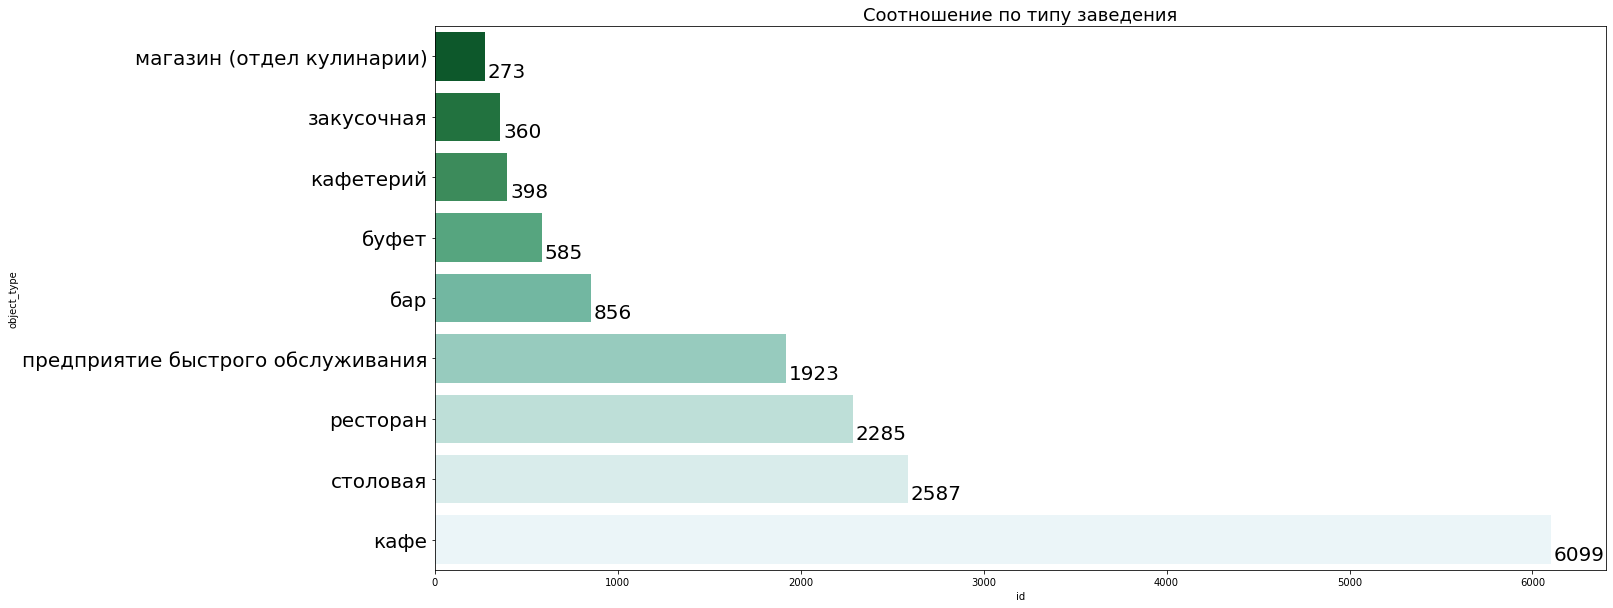

In [10]:
show_horizontal_bar(group_type['id'], group_type['object_type'], (21, 10), 15, 'Соотношение по типу заведения')

Самым частым типом общественного питания является кафе.

Из определения ГОСТа мы можем сделать вывод, что преимуществом для открытия данного типа заведения является возможность иметь скромное и проработанное меню, состоящее из блюд не требующих излишне сложной готовки,
но и не представляющими из себя изыски. Для построения бизнеса в городе, 
где у многих все еще запросто в квартире мебель совестских времен , действительно оптимальный выбор вида предприятия. Начало для нашей идеи положено правильно.

---

### Комментарий наставника

Здорово, ты выбрал удачный график для этой задачи.

Насчёт вывода, он, конечно, весьма спорный, но действительно верно то, что начало заложено. Количество != качество, и достаточно много кафе это ларьки с шаурмой (просто так себя позиционируют) :)

---

#### 3. Cоотношение сетевых и несетевых заведений

Чтобы выяснить соотношение сетевых и несетевых заведений, снова сгруппируем таблицу и выведем результат на графике

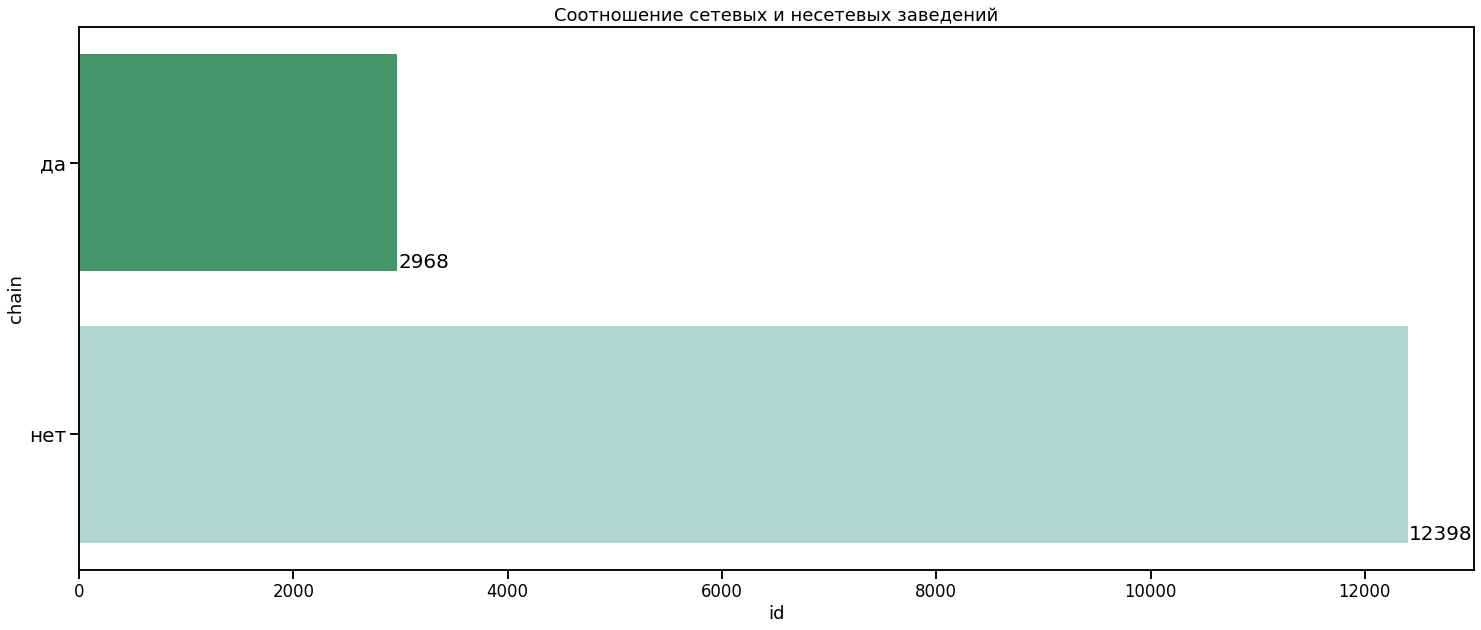

In [11]:
#сгруппируем по "сетевиковости", подсчитав количество id в каждой группе
group_chain = rest_data.groupby('chain')['id'].count().sort_values().reset_index()

#выведем на печать
show_horizontal_bar(group_chain['id'], group_chain['chain'], (25, 10), 15, 'Соотношение сетевых и несетевых заведений')

Разница впечатляющая. В 4 с лишним раза несетевых заведений больше, чем сетевых. Вохможно на рынке не так просто выживать сетям, как кажется на первый взгляд. Но это означает, что приобретать франшизу, чтобы учавствовать в этом рынке, совсем не обязательно. Обычный штучный бизнес вполне может составить конкуренцию гигантам рынка. Можно быть уверенным - при правильном подходе небольшое кафе может существовать в столице. Это выглядить оптимистично . Останется лишь определиться с подходом. И конкурентами.

---

### Комментарий наставника

Твоё наблюдение вполне интересно. Тут ещё может играть тот фактор, что многие открывают свои малые преприятия, со своим, так сказать, калоритом. А сетевиков не много и не мало, скорей всего, просто "другого" гораздо больше. Посмотри на улице, сколько всяких забегаловок :)

---

#### 4. Вид объекта, в зависимости от того, сетевой ли он

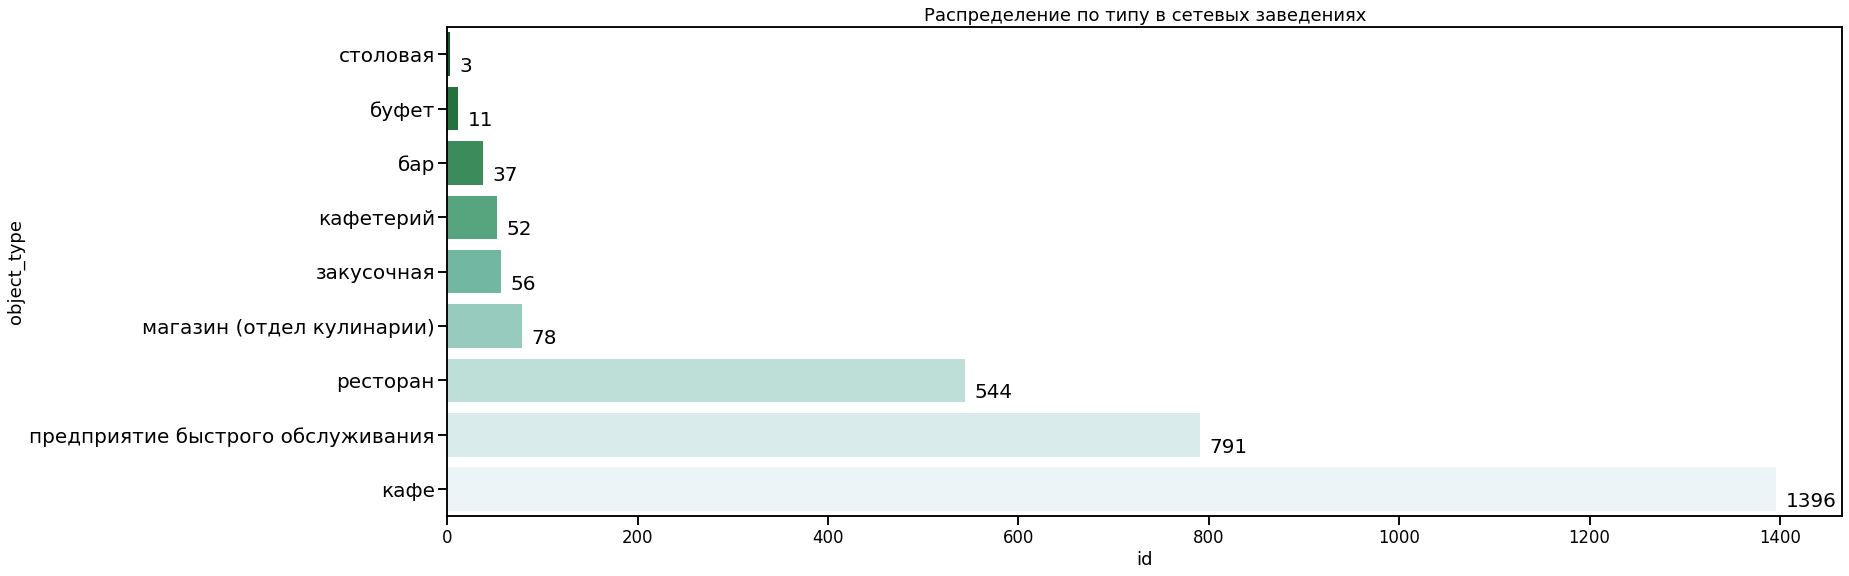

In [12]:
#отфильтруем таблицу в зависимости от принадлежности
chain_rest = rest_data.query('chain == "да"')

#сгруппируем по типу объекта, подсчитав количество id в каждой группе
group_chain_rest = chain_rest.groupby('object_type')['id'].count().sort_values().reset_index()

#выведем на печать
show_horizontal_bar(group_chain_rest['id'], group_chain_rest['object_type'], (25, 9), 10,
                    'Распределение по типу в сетевых заведениях')

Учитывая, что кафеен и без того больше всего, корректнее было бы сравнивать долевое отношение общего числа заведений к числу заведений, находящихся в сети. Для этого соберем в одну кучку две таблицы: общее число заведений по типу и число сетевых заведений по типу. Это упростит восприятие данных.

---

### Комментарий наставника

Откуда кофейни появились?! :)

Ну, а так. Тут ты прав с той стороны, что стоит рассмотреть с позиции отдельных заведений, но и про исходную постановку тоже стоит забывать. Ведь здесь ещё играет роль насыщенность территории Москвы заведениями из какой-либо категории.

---

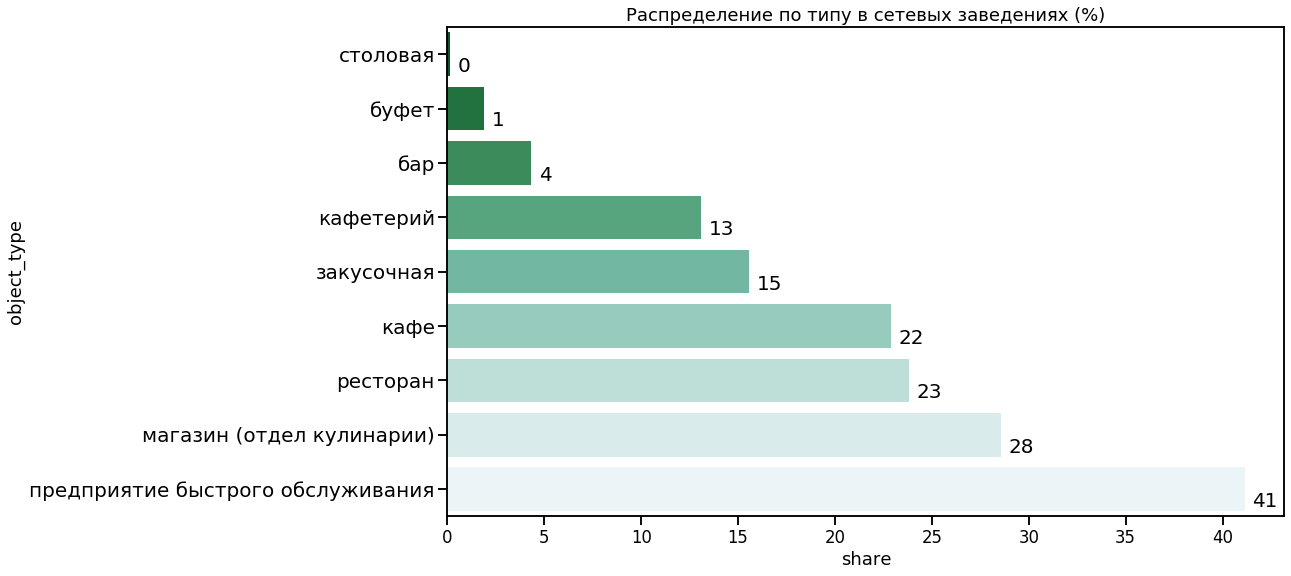

In [13]:
# переименуем столбец в сетевой таблице
group_chain_rest.columns = ['object_type', 'chain_id']

#смержим данные и отсортируем для красоты построения графика
share_chain = group_type.merge(group_chain_rest)
share_chain['share'] = (share_chain['chain_id'] / share_chain['id']) *100
share_chain = share_chain.sort_values(by = 'share')

#построим график
show_horizontal_bar(share_chain['share'], share_chain['object_type'], (15, 9), 0.4, 
                    'Распределение по типу в сетевых заведениях (%)')

Выходит, что для столовых - это меньше процента, а для кофеен (которые в первом графике стояли на первом месте по числу предприятий) - немногим больше 20 процентов. Лидером по сетевому размещенияю являются заведения быстрго питания (что было достаточно интуитивно). Для инвесторов есть отличная новость - лишь 20% кофеен принадлежит суровым сетевикам. Это значит, что, во-первых, конкурировать с частным бизнесом будет проще, а во-вторых, при масштабировании заведений (а мы верим в успех предприятия, где гостя обслуживают и развлекают роботы), на рынке найдется достаточно место езе для одной сети.

---

### Комментарий наставника

Хм, оптимистично. Но насчёт частного бизнеса не стоит расслабляться. Ведь ты тоже не сетевик, и вполне может быть, что кто-то из частников тоже имеет какую-то интересную фичу :)

---

#### 5. Типовое сетевое заведение

Продолжим и дальше работать с сетевыми заведениями. Сгруппируем по уникальным названиям сетей. Посмотрим, как именно выглядит типичное сетевое заведение.

In [14]:
#сгруппируем отфилтрованный фрейм данных по наименованию объекта 
#и посчитаем количество id и среднее число посадочных мест
chain_group = (chain_rest.groupby(by = 'object_name')
    .agg({'id' : 'nunique', 'number' : 'mean'}).reset_index())
chain_group.head()

,object_name,id,number
0,Beverly Hills Diner,1,88.000000
1,Bierloga,1,75.000000
2,Black & White,1,40.000000
3,Bocconcino,3,66.666667
4,BooBo,1,46.000000


Вот и нашлись не исправленные ранее дубликаты (в сети всего 1 ресторан). Учитывая, что для несетевых заведений проблема разного написания наименований так остро не стоит, разберемся только с теми дубликатами, которые имеют статус сетевика

In [15]:
# количество заведений, до исправления написания
len(chain_group['object_name'].unique())

724

In [16]:
#в первую очередь удерем заглавные буквы и посмотрим, сильно ли изменилась картина
chain_rest['object_name'] = chain_rest['object_name'].str.lower()

#и снова сгруппируем
chain_group = (chain_rest.groupby(by = 'object_name')
    .agg({'id' : 'nunique', 'number' : 'mean'}).reset_index())

len(chain_group['object_name'].unique())

577

In [17]:
#количество наименований сократилось значительно. 
#Посмотрим, что осталось по итогу (единичные заведения)

len(chain_group.query('id == 1'))

331

Список единичных заведений составляет более половины от общей цифры. Это может сильно исказить наше представление о том, что более характерно для сетевых заведений: большое количество точек или большое количестве мест. Попробуем пролемматизировать наименования, чтобы максимально устранить проблему. Пусть и визуально.

In [20]:
#импортиреум требуемые библиотеки
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

#создадим цикл, выделяющий леммы
lemmas = []
for row in chain_rest['object_name']:
    
    lemmas += m.lemmatize(row)
print(Counter(lemmas))

Counter({'\n': 2656, ' ': 1878, ' «': 312, '»\n': 307, 'пицца': 258, 'kfc': 188, 'кафе': 187, 'шоколадница': 185, 'макдоналдс': 173, 'бургер': 166, 'кинг': 159, 'с': 148, 'суша': 127, 'кофе': 114, 'теремок': 111, '-': 108, 'домино': 99, "'": 99, 'картошка': 98, 'крошка': 96, 'ресторан': 89, 'wok': 86, 'милти': 81, '№': 69, '1': 67, 'папа': 67, 'джонс': 67, 'му': 64, 'прайм': 62, 'хаус': 61, 'хинкальный': 54, 'додо': 54, 'чайхон': 53, 'якитория': 50, 'себя': 49, 'иль': 48, 'танука': 47, 'патио': 45, 'брат': 41, 'караваев': 41, 'старый': 41, 'starbucks': 40, 'subway': 38, 'старбакс': 36, 'хлеб': 35, 'мята': 34, 'lounge': 34, 'насущный': 33, 'кулинарный': 31, 'андерсон': 29, 'быстрый': 28, 'пиццерия': 27, 'лавка': 25, 'предприятие': 25, 'cofix': 25, 'хата': 24, 'обслуживание': 24, 'сабвевать': 23, 'бар': 20, 'кофейня': 20, 'мак': 20, 'кофемания': 19, 'штолла': 19, 'кружка': 18, 'волконский': 18, 'паоло': 18, 'coffee': 17, 'сушишоп': 17, 'стардогs': 17, 'але': 16, 'да': 16, 'сет': 15, 'пла

Как мы видим, на первом месте у нас - пробелы. Может статься, что дропнув их список немного выгладится. Так же может помочь устранение кавычек (причем до удаления пробелов, т.к. открывающая кавычка определяется вместе с пробелом). Ну и заодно дефис. Это, что касается топовых позиций лемматизации. Затем стоит обратить внимание, что отдельно определились Старбаксы, КФС, кофехаусы. Поэтому в первую очередь избавимся в полном списке от мешающей пунктуации, посмотрим, что выйдет из этого, а потом попробуем собрать воедино все достоверно известные нам (и выявленные леммой) сетки.

In [21]:
#кавычки
chain_rest['object_name'] = chain_rest['object_name'].str.replace('«','')
chain_rest['object_name'] = chain_rest['object_name'].str.replace('»','')

#пробелы
chain_rest['object_name'] = chain_rest['object_name'].str.replace(' ','')

#дефисы
chain_rest['object_name'] = chain_rest['object_name'].str.replace('-','')

#апостроф
chain_rest['object_name'] = chain_rest['object_name'].str.replace("'","")

---

### Комментарий наставника

Сюда бы регулярочку

---

In [22]:
#Перейдем к выявленным лемматизацией сеткам, для которых напишем функцию (пусть и ужасно длинную)
#и добавим в нее все, что бросится в глаза.
#это ведь можно было кк-то через словарь сделать с меньшим кодом? Но я не догадалась как()
def serch_word_in(row):
    
    #ищет слова в серии
    
    purpose_in = row['object_name']
    
    if 'старбакс' in purpose_in or 'starbucks' in purpose_in:
        return 'starbucks'    
    elif 'fridays' in purpose_in:
        return 'fridays'    
    elif 'kfc' in purpose_in:
        return 'kfc'    
    elif 'prime' in purpose_in or 'прймстар' in purpose_in:
        return 'prime'    
    elif 'кофехаус' in purpose_in:
        return 'кофехаус'    
    elif 'крошкакартошка' in purpose_in:
        return 'крошкакартошка'    
    elif 'costacoffee' in purpose_in or 'костакофе' in purpose_in:
        return 'costacoffee'    
    elif 'subway' in purpose_in:
        return 'subway'    
    elif 'караваев' in purpose_in:
        return 'братьякараваевы'    
    elif 'доминос' in purpose_in or 'dominos' in purpose_in:
        return 'доминос'
    elif 'якитория' in purpose_in:
        return 'якитория'
    elif 'кружка' in purpose_in:
        return 'кружка'
    elif 'космик' in purpose_in:
        return 'космик'    
    elif 'tutti' in purpose_in:
        return 'tuttifrutti'          
    elif 'мята' in purpose_in:
        return 'мята'         
    elif 'андерсон' in purpose_in:
        return 'андерсон'      
    elif 'стардог' in purpose_in:
        return 'стардогс'   
    elif 'макдоналд' in purpose_in:
        return 'макдоналдс'     
    elif 'сушиwok' in purpose_in:
        return 'сушиwok'      
    elif 'милти' in purpose_in:
        return 'милти' 
    elif 'додо' in purpose_in:
        return 'додопицца'    
    elif 'баскинроб' in purpose_in:
        return 'баскинробинс'    
    elif 'шоколадниц' in purpose_in:
        return 'шоколадница'        
    elif 'бургеркинг' in purpose_in:
        return 'бургеркинг'         
    elif 'пападжонс' in purpose_in:
        return 'пападжонс'    
    elif 'ильпатио' in purpose_in:
        return 'ильпатио'        
    elif 'пиццахат' in purpose_in:
        return 'пиццахат'         
    elif 'ситип' in purpose_in:
        return 'ситипицца'      
    elif 'торро' in purpose_in:
        return 'торрогриль'      
    elif 'азбукав' in purpose_in:
        return 'азбукавкуса'    
    elif 'тун' in purpose_in:
        return 'сушитун'    
    elif 'маким' in purpose_in or 'makim' in purpose_in:
        return 'макимаки'        
    elif 'вабис' in purpose_in:
        return 'вабисаби'    
    elif 'гудман' in purpose_in:
        return 'гудман'    
    elif 'coffeeshop' in purpose_in:
        return 'coffeeshop'   
    elif 'вьетк' in purpose_in:
        return 'вьеткафе'     
    else:
        return purpose_in

In [23]:
#пропустим через функцию столбец с названиями
chain_rest['object_name_new'] = chain_rest.apply(serch_word_in, axis = 1)

#снова сгруппируем данные, чтобы проверить результат по новому столбцу
chain_group = (chain_rest.groupby(by = 'object_name_new')
    .agg({'id' : 'nunique', 'number' : 'mean'}).reset_index())

print('Количество уникальных значений:', len(chain_group['object_name_new'].unique()))
print('Количество единичных заведений:', len(chain_group.query('id == 1')))

Количество уникальных значений: 395
Количество единичных заведений: 192


Чтож, вместо 724 первоначальных, мы получили куда более скромные 395 сетей (из которых только 192 имеют одно заведение). Такие данные куда больше подойдут для анализа.

В контексте поставленного вопроса, сети, в которых определилось лишь одно заведение, нам не подайдут: у них заведомо мало заведений (которые мы, вероятно, недочистили). А значит отвечать на поставленный вопрос мы будем по тем сетям, где уже можно оценить количество работающих точек.

In [24]:
chain_result = chain_group.query('id > 1')

Получив данные, посмотрим распределения количества заведений и установленных в них мест для посетителей.

In [25]:
#автоматизируем вывод графика

def hist_show(line, title, bins):
    """рисует прекрасные зеленые гистограмы"""
    
    fig, ax = plt.subplots(figsize=(10, 4)) #зададим размер
    sns.set_context('talk') #зададим тип фона в общем стиле
    ax = plt.hist(line, bins = bins, color = 'green', alpha = 0.4, range = (0, 100)) #ограничение оси, чтобы выглядело красивше
    plt.title(title) #создадим титл
    plt.grid(color='gray', linestyle='--', linewidth=0.2)
    
    plt.show()
    print('Медианное значение:', line.median()) #заодно напечатаем важные для распределений параметры

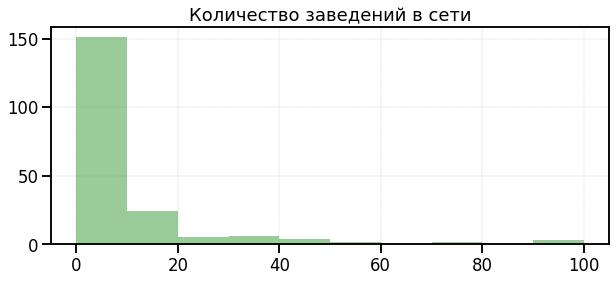

Медианное значение: 4.0


In [26]:
hist_show(chain_result['id'], 'Количество заведений в сети', 10)

Как видно из графика, большинство заведений имеют малое количество точек. Поробуем проанализировать сети, в которых больше 3 заведений (возможно дубляжи дают о себе знать)

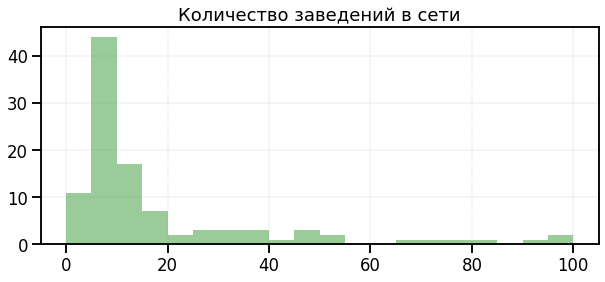

Медианное значение: 9.0


In [27]:
chain_result_2 = chain_group.query('id > 3')
hist_show(chain_result_2['id'], 'Количество заведений в сети', 20)

Теперь явно задвоения названий меньше влияют на результат (об этом говорит возросшая медиана, которая перестала совпалать с ограничительным значением). Таким образом выходит, что в среднем для сети характерно около 6 заведений. Продолжим и дальше работать с "обрезанной" таблицей - посмотрим количество посадочных мест сети.

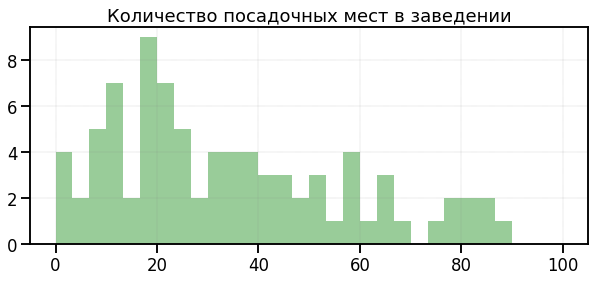

Медианное значение: 38.2


In [28]:
hist_show(chain_result_2['number'], 'Количество посадочных мест в заведении', 30)

Большая часть сетевых заведений имеет до 50 пасадочных мест. Выходит, что большинство сетей имеют сравнительно небольшое количество точек, расположенных в помещениях, вмещяющих не более 50 человек. Важно еще взглянуть на то, как эти цифры распределяются в выбранном нами формате заведения: кафе. Посмотрим, что выйдет из этого.

In [29]:
#создадим срез данных
chain_rest_cafe = chain_rest.query('object_type == "кафе"')

#снова сгруппируем данные, чтобы проверить результат по новому столбцу
chain_group_cafe = (chain_rest_cafe.groupby(by = 'object_name_new')
    .agg({'id' : 'nunique', 'number' : 'mean'}).reset_index())

#оставим за пределами слишком малое количество заведений. 
chain_cafe = chain_group_cafe.query('id > 1')

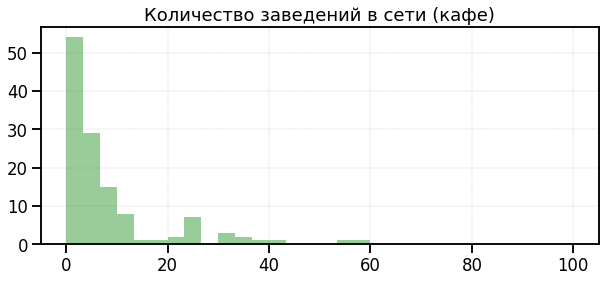

Медианное значение: 4.0


In [30]:
#Выведем результаты на печать
hist_show(chain_cafe['id'], 'Количество заведений в сети (кафе)', 30)

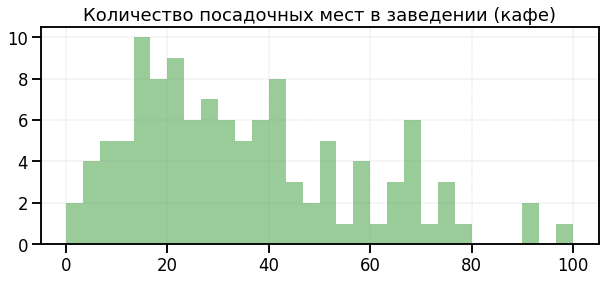

Медианное значение: 35.0


In [31]:
#Выведем результаты на печать
hist_show(chain_cafe['number'], 'Количество посадочных мест в заведении (кафе)', 30)

Чтож, выходит что большинство сетевых кафе -представители маленьких сеток с малой вместимостью, около 35 человеко-мест. Выходит, что для нашего проекта они вряд ли представят сербезную угрозу (кроме стоимости блюд).

---

### Комментарий наставника

Вроде бы, со вместимостью ещё не решились, но могу с тобой согласиться, что иной формат заведения может отбросить сетевиков, как прямых конкурентов

---

#### 6. Среднее количество посадочных мест. Влияние вида заведения.

Теперь же посмотрим на количество мест во всех объектах, в зависимости лишь от типа заведения. Для этого вновь сгруппируем данные, как делали несколько шагов выше.

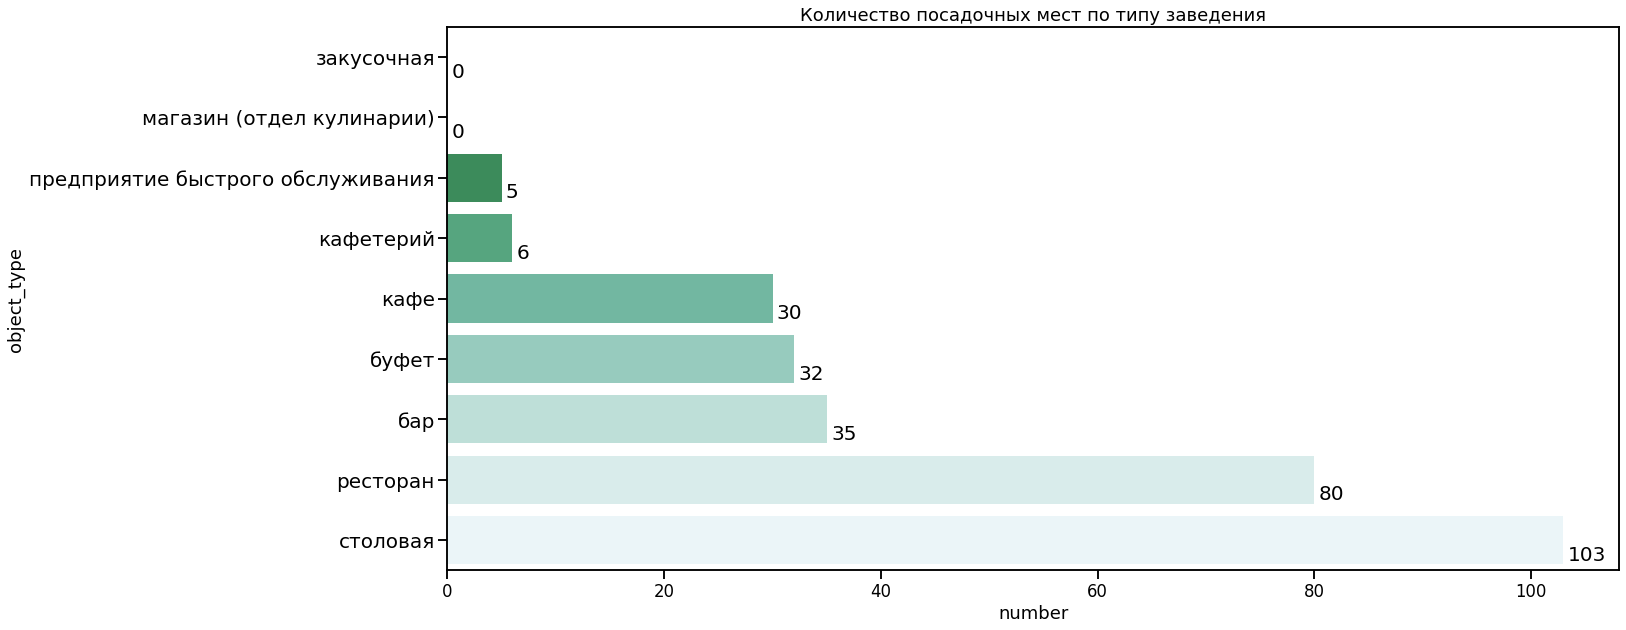

In [32]:
#группировка по типу объекта, с подсчетом среднего количества посадочных мест
group_type_num = rest_data.groupby('object_type').agg({'number' : 'median'}).reset_index().sort_values(by = 'number')

#выведем на печать
show_horizontal_bar(group_type_num['number'], group_type_num['object_type'], (21, 10), 0.4, 
                    'Количество посадочных мест по типу заведения')

Больше всего людей размещают столовые, что и вполне закономерно, учитывая формат данных заведений. Для нашего формата обслуживания, вероятно, потребуется большое пространство, ведь надо не только желающую хлеба и зрелищ публику рассадить, но и оставить пространство для работы (и обслуживания их работы) роботов. Посмотрим, как распределено количество мест исключительно в кафе (без деление на сеть и нет). Возможно это поможет принять решение о том, как много людей стоит размещать нам.

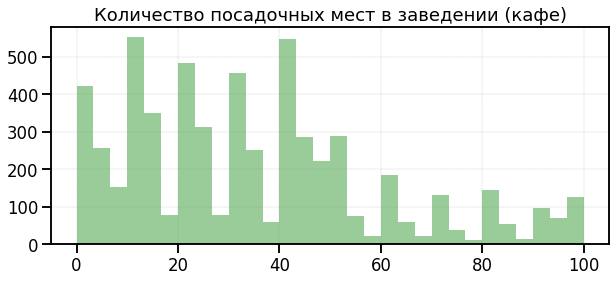

Медианное значение: 30.0


In [33]:
#формируем срез данных
rest_data_cafe = rest_data.query('object_type == "кафе"')

#выводим на печать 
hist_show(rest_data_cafe['number'], 'Количество посадочных мест в заведении (кафе)', 30)

Для больших кафе тоже есть место на рынке (пусть это больше напоминает выбросы), но преобладают небольшие, уютные (наверное) заведения, которые проще контролировать.

---

### Комментарий наставника

Не всё выбросы, потому что сравнительно немало заведений имеют вместимость в сотню.

А идея рабочих зон вполне себе интересная, и может "бомбануть"

---

#### 7. Топ-10 улиц по количеству заведений


Для ответа на вопрос "Какие улицы являются популярными для открытия кафе", выделим из нашей таблицы отдельный столбец с наименованием улицы.

In [34]:
#лямсбла функция забирает все после второй встреченной запятой, а после роняет заглавные буквы
rest_data['street'] = rest_data['address'].apply(lambda x: x.split(',')[1]).str.lower()

#сгруппируем данные по улице, чтобы оценить результат работы функции
group_street = rest_data.groupby('street')['id'].count().sort_values(ascending = False).reset_index()
group_street.head(10)

,street,id
0,город зеленоград,232
1,проспект мира,204
2,профсоюзная улица,182
3,ленинградский проспект,171
4,пресненская набережная,167
5,варшавское шоссе,161
6,ленинский проспект,147
7,поселение сосенское,138
8,проспект вернадского,132
9,кутузовский проспект,114


Учитывая сложность административного устройства города Москвы, а именно нахождение внутри столицы небольших поселений, наша функция не совсем корректно выделила в топ Зеленоград и поселение Соснское - наименования улиц отвалились за пределы. Попробуем понять, сможем ли мы работать с Зеленоградом и поселением Сосенским (и проч.). Для этого найдем догрузим данные из открытых источников (заодно определим районы).

---

### Комментарий наставника

Ты же планируешь открывать заведение в Москве, и это было бы корректно. Ноу-хау притянет и жителей области, а вот с Москвы в область вряд ли

---

In [48]:
#Добавим таблицу со всеми адресами Москвы (с открытого портала Москвы скачал  датасет в экселе
#и сократил его неприлично большой вес "руками")

vse_mkd = pd.read_excel('data-29580-2019-11-09.xlsx')
vse_mkd.columns = ['address', 'area', 'village', 'street_city']


In [49]:
vse_mkd.head()

,address,area,village,street_city
0,"город Москва, Варшавское шоссе, дом 150, строе...",муниципальный округ Чертаново Южное,NaN,Варшавское шоссе
1,"город Москва, Косинская улица, дом 26А",муниципальный округ Вешняки,NaN,Косинская улица
2,"город Москва, Гороховский переулок, дом 21",муниципальный округ Басманный,NaN,Гороховский переулок
3,"город Москва, Тагильская улица, дом 4, строени...",муниципальный округ Метрогородок,NaN,Тагильская улица
4,"город Москва, Ленинградский проспект, дом 73А,...",муниципальный округ Сокол,NaN,Ленинградский проспект


In [50]:
#смержим нашу аблице с ресторанами и таблицу с районами
rest_data_new =  rest_data.merge(vse_mkd, how = 'left')

#посмотрим, что не прогрузилось
test_null = rest_data_new.query('area.isnull()')
test_null.head(7)

,id,object_name,chain,object_type,address,number,street,area,village,street_city
860,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100,дом 30,NaN,NaN,NaN
861,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100,дом 30,NaN,NaN,NaN
1493,25349,Ресторан «Гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40,дом 5/14,NaN,NaN,NaN
1860,77651,Щербенко Л.А.,нет,кафе,"город Москва, поселение Вороновское, село Воро...",50,поселение вороновское,NaN,село Вороново,NaN
1861,128021,Кафе «Мама МИА»,нет,кафе,"город Москва, поселение Внуковское, улица Лётч...",12,поселение внуковское,NaN,NaN,улица Лётчика Ульянина
1862,120299,Пиццерия,нет,кафе,"город Москва, поселение Внуковское, улица Лётч...",24,поселение внуковское,NaN,NaN,улица Лётчика Ульянина
1863,125246,Суши Wok,да,кафе,"город Москва, поселение Внуковское, улица Лётч...",5,поселение внуковское,NaN,NaN,улица Лётчика Ульянина


В городской базе данных отсутствуют наименования некоторых районов. Это связано с тем, что территориальное устройство ТИНАО (так называемая "Новая Москва", на территории которой находятся такие поселения, как Внуковское (таких "районов" всего 21)) не подразумевает районное деление. Таким образом мы из столбца "village" можем подтянуть данные в столбец с районами, если детальная информация отсутствует+

In [42]:
rest_data_new['area'] = rest_data_new['area'].fillna(rest_data_new['village'])
test_null_2 = rest_data_new.query('area.isnull()')
test_null_2.head()

,id,object_name,chain,object_type,address,number,street,area,village,street_city
860,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100,дом 30,NaN,NaN,NaN
861,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100,дом 30,NaN,NaN,NaN
1493,25349,Ресторан «Гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40,дом 5/14,NaN,NaN,NaN
1861,128021,Кафе «Мама МИА»,нет,кафе,"город Москва, поселение Внуковское, улица Лётч...",12,поселение внуковское,NaN,NaN,улица Лётчика Ульянина
1862,120299,Пиццерия,нет,кафе,"город Москва, поселение Внуковское, улица Лётч...",24,поселение внуковское,NaN,NaN,улица Лётчика Ульянина


Следуя дальше по той же логике, мы видим, что районы все еще отсутствуют для некоторых поселений, а также для строк, адрес которых некорректно (без указания города) был внесен в таблицу. Посмотрим, как много адресов не опредлеилось вообще и решим, что сделать с ними.

In [43]:
test_null_3 = rest_data_new.query('area.isnull() and village.isnull() and street_city.isnull()')['id']
len(test_null_3)

89

Всего 89 адресов. Чтобы не исказить данные, дропнем их из таблицы.

In [44]:
rest_data_new = rest_data_new.query('id not in @test_null_3')
rest_data_new.query('area.isnull()').head()

,id,object_name,chain,object_type,address,number,street,area,village,street_city
1861,128021,Кафе «Мама МИА»,нет,кафе,"город Москва, поселение Внуковское, улица Лётч...",12,поселение внуковское,NaN,NaN,улица Лётчика Ульянина
1862,120299,Пиццерия,нет,кафе,"город Москва, поселение Внуковское, улица Лётч...",24,поселение внуковское,NaN,NaN,улица Лётчика Ульянина
1863,125246,Суши Wok,да,кафе,"город Москва, поселение Внуковское, улица Лётч...",5,поселение внуковское,NaN,NaN,улица Лётчика Ульянина
1867,77869,Кафе «Наш бараш»,нет,ресторан,"город Москва, поселение Десеновское, Армейская...",60,поселение десеновское,NaN,NaN,Армейская улица
1869,152560,Мини-пекарня,нет,предприятие быстрого обслуживания,"город Москва, город Троицк, микрорайон ""В"", до...",0,город троицк,NaN,NaN,"микрорайон ""В"""


У нас все еще остались пропуски в столбце "район". Но их очень удачно выделила функция, написанная для отделения улицы от адреса несколько пунктов назад. Вот именно на основании ее результатов и заполним оставшиеся пропуски

In [45]:
rest_data_new['area'] = rest_data_new['area'].fillna(rest_data_new['street'])
rest_data_new.head()

,id,object_name,chain,object_type,address,number,street,area,village,street_city
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова,муниципальный округ Ярославский,NaN,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина,муниципальный округ Таганский,NaN,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановская улица,муниципальный округ Таганский,NaN,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевская улица,муниципальный округ Лианозово,NaN,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,муниципальный округ Лианозово,NaN,Абрамцевская улица


Актуальной проблемой для выявления популярных улиц все еще являются Зеленоград и прочие поселения. Решить данную проблему можно двумя способами. Во-первых, определять популярность улиц, группируя не только по улице, но и по району (этот вариант мне импонирует больше всего) - таким образом мы не будем в одну гребенку собирать проспект Мира на отшибе города (у МКАД) и тот же проспект Мира, но в районе ВДНХ. Второй вариант - использовать наименования улиц, подруженные из городской базы данных. Но в ней имеются пропуски в тем же Зеленограде, где в адресе отсутсвует улица и номер дома, а имеется лишь корпус. Поэтому для определения топ-10 улиц воспользуемся первым вариантом.

In [46]:
top_street = rest_data_new.groupby(['area','street_city'])['id'].count().sort_values(ascending = False).head(10).reset_index()
top_street

,area,street_city,id
0,муниципальный округ Пресненский,Пресненская набережная,167
1,муниципальный округ Хорошевский,Ходынский бульвар,102
2,муниципальный округ Арбат,улица Новый Арбат,92
3,муниципальный округ Даниловский,улица Ленинская Слобода,85
4,муниципальный округ Марьина Роща,улица Сущёвский Вал,82
5,муниципальный округ Замоскворечье,Пятницкая улица,80
6,муниципальный округ Чертаново Центральное,Кировоградская улица,79
7,муниципальный округ Арбат,улица Арбат,77
8,муниципальный округ Басманный,улица Покровка,77
9,муниципальный округ Войковский,Ленинградское шоссе,72


Как мы видим, локации теперь имеют вполне понятную привязку и дают более широкий ответ на вопрос о "топ-10" наиболее популярных улиц для открытия ресторана, а заодно и определили районную принадлежность данных улиц. Отобразим результат на графике

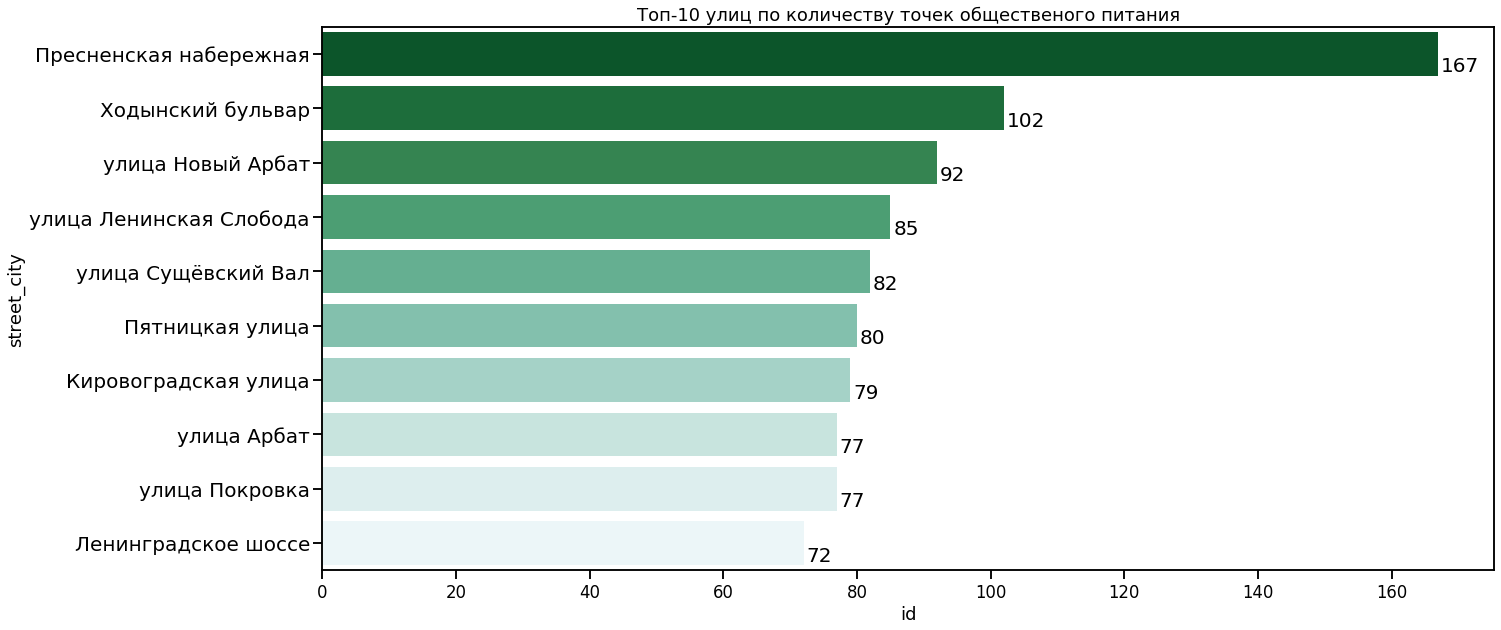

In [47]:
show_horizontal_bar(top_street['id'], top_street['street_city'], (21, 10), 0.4, 
                    'Топ-10 улиц по количеству точек общественого питания')

В отличии от выборки по всем кафе города, в центре кафе предпочитают размещать больше гостей (в среднем по городу - 30). В нашем случае, когда потребуется пространство для работы современных официантов, которые не должны доставлять своими перемещениями дискомфорт гостям, имеет смысл прислушаться к мнению конкурентов и не размещать более 40 человек за раз. Но и менее тоже не стоит.

#### 10. Итоговый вывод

Учитывая проведенный анализ, можно сформулировать следующие постулаты:

исходя из эксклюзивности предложения на рынке заинтересованность со стороны гостей будет (при беглом обзоре сети интренет становится понятно, что никто в Москве пока не вышел с таким заведением на рынок, но это вопрос времени https://www.bbc.com/news/technology-46466531;
разместив кафе в одном из популярных районов Москвы (Пресненская набережная - Москва-Сити, Ходынский бульвар - не центр города, но распоожен в притягательном для жителей квартале, Новый Арбат - второе сердце города) мы получим не только большую проходимость, но и спрос со стороны туристических групп, который, при правильном подходе к туроператорам, можно выгодно стабилизировать;
стоит отметить, что для такого передового вида кафе, на мой взгляд, идеально подойдет Новый Арбат (по советским меркам более чем хай-течный (см. фото в презентации)), ведь здесь наиболее емкий трафик из жителей района, работающих граждан и толп туристов. Кроме того, чтоит отметить, что в отличии от Пресненской Набережной, где так или иначе сконцентрирован небольшой состоятельный класс населения, на Новом Арбате публика шире, а значит и спрос может быть выше;
по своему внутреннему размеру кафе не должно превышать приемлемых 40-50 посадочных мест, что позволит не только не тратиться на аренду больших и простаивающих площадей, но и снизить количество необходимых для работы роботов, ведь чем меньше людей надо обслужить, тем меньше техники необходимо;
в случае масштабируемости проекта в сеть, что вполне возможно, подобную модель можно будет легко разместить в упомянтых популярных улицах, так же сохранив число посадочных мест.

Презентация ссылка  https://yadi.sk/d/f8V2cYAted-NWQ

---

### Комментарий наставника

Поздравляю со сдачей тебя работы :)

Ты молодец, получилось занятно, и даже предлагал различные решения, которые заинтересовали бы инвесторов. Вполне возможно, что на основе твоих выводов, они бы загорелись, и предложили бы разумные альтернативы.

Отмечу, что мне понравилось то, что ты решил размещать инновационное кафе на Новом Арбате. Согласен, туристам не надоест. Вспомним Black Star Burger.

Однако мне не понравилась презентация, и поверь, она вряд ли понравится инвесторам. Не надо в слепую экспортировать ноутбук. Он не совсем презентабелен. Возьми с ноутбука графики, и подготовь презентацию с помощью соответствующих приложений.

Доделай это, и я приму работу. Успеха :)

---

Презентация 

---

### Комментарий наставника

Работу принимаю. Молодец.

К твоей презентации дам несколько рекомендаций:
- Меньше текста
- Если текст есть, то он должен быть ёмким. Буквально пару фраз.

Помни, что презентацию сопровождает твой доклад, где развернутый текст будет озвучен. Презентация служит визуальным триггером, которая позволит обратить внимание на ключевую информацию, заложенную в тексте.

---